In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics import classification_report

In [ ]:
#X_train_fashion = fashion_train.drop('label',axis = 1)
#y_train_fashion = fashion_train['label']
#X_test_fashion = fashion_test.drop('label',axis = 1)
#y_test_fashion = fashion_test['label']
((X_train_fashion, y_train_fashion), (X_test_fashion, y_test_fashion)) = fashion_mnist.load_data()

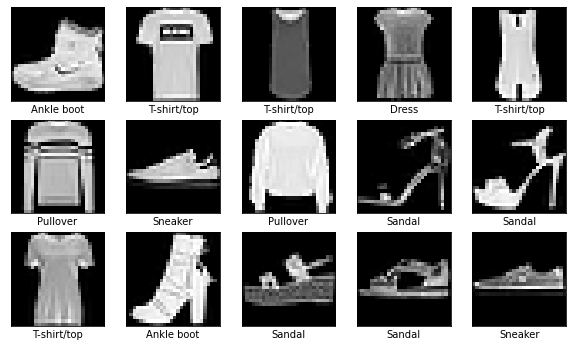

In [ ]:
#Reshaping the dataset
x_train_reshape = X_train_fashion.reshape(-1,28,28)
x_test_reshape = X_test_fashion.reshape(-1,28,28)

#Names of clothing accessories in order 
col_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

#Visualizing the images
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_reshape[i], cmap='gray')
    plt.xlabel(col_names[y_train_fashion[i]])
plt.show()

In [ ]:

def visualize_input(img, ax):
    ax.imshow(img, cmap='summer')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

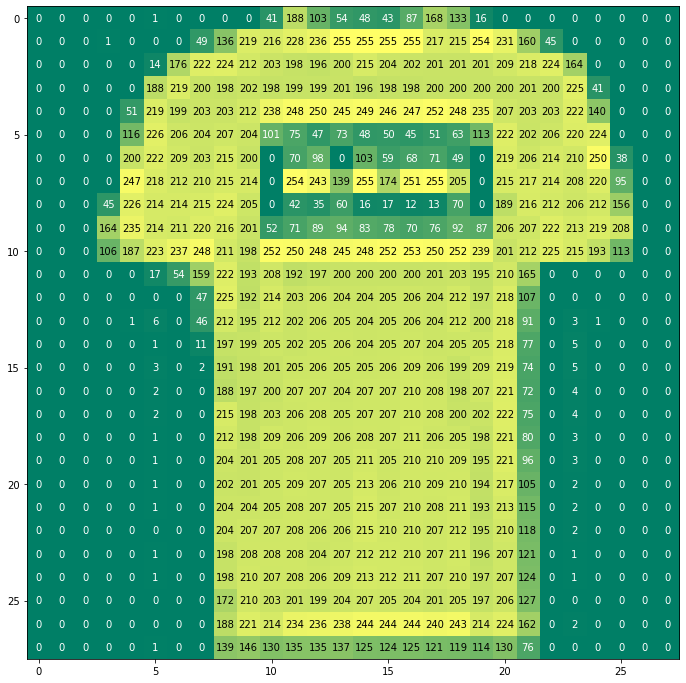

In [ ]:
#Visualizing for Fashion MNIST
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(x_train_reshape[1], ax)
plt.show()

In [ ]:
X_train_fashion = X_train_fashion.reshape(60000, 784)
X_test_fashion = X_test_fashion.reshape(10000, 784)

In [ ]:
#Encoding Fashion MNIST Labels
y_train_fashion = to_categorical(y_train_fashion, num_classes=10)

y_test_fashion = to_categorical(y_test_fashion, num_classes=10)

In [ ]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(10,activation='softmax'),
])

#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

#Fitting the model
H = model.fit(X_train_fashion, y_train_fashion, batch_size=100, epochs=30)

Epoch 1/30
600/600 [==============================] - 3s 4ms/step - loss: 1.0972 - accuracy: 0.6255
Epoch 2/30
600/600 [==============================] - 2s 4ms/step - loss: 0.7374 - accuracy: 0.7438
Epoch 3/30
600/600 [==============================] - 2s 4ms/step - loss: 0.6680 - accuracy: 0.7740
Epoch 4/30
600/600 [==============================] - 2s 4ms/step - loss: 0.6313 - accuracy: 0.7871
Epoch 5/30
600/600 [==============================] - 3s 4ms/step - loss: 0.6091 - accuracy: 0.7960
Epoch 6/30
600/600 [==============================] - 2s 4ms/step - loss: 0.5958 - accuracy: 0.7998
Epoch 7/30
600/600 [==============================] - 2s 4ms/step - loss: 0.5798 - accuracy: 0.8060
Epoch 8/30
600/600 [==============================] - 2s 4ms/step - loss: 0.5721 - accuracy: 0.8061
Epoch 9/30
600/600 [==============================] - 2s 4ms/step - loss: 0.5614 - accuracy: 0.8119
Epoch 10/30
600/600 [==============================] - 3s 4ms/step - loss: 0.5584 - accuracy: 0.8103

In [ ]:
#Evaluating fashion MNIST test accuracy
test_loss_fashion, test_acc_fashion = model.evaluate(X_test_fashion, y_test_fashion)

313/313 [==============================] - 1s 1ms/step - loss: 0.3706 - accuracy: 0.8687


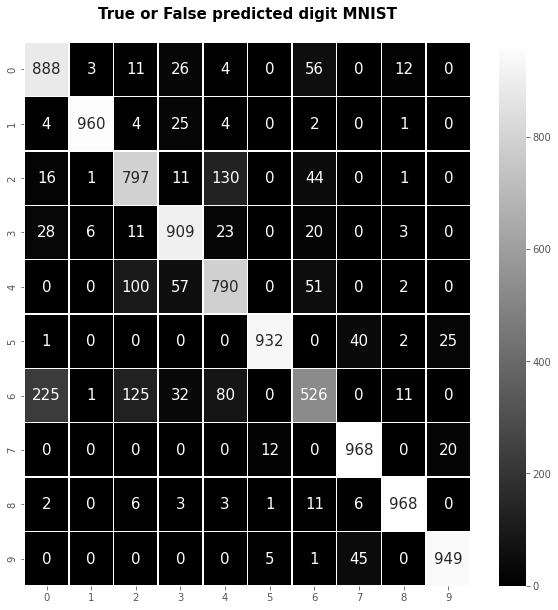

In [ ]:
#Predicting the labels-Fashion
y_predict_fash = model.predict(X_test_fashion)
y_predict_fash=np.argmax(y_predict_fash, axis=1)
y_test_fash_eval=np.argmax(y_test_fashion, axis=1)
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

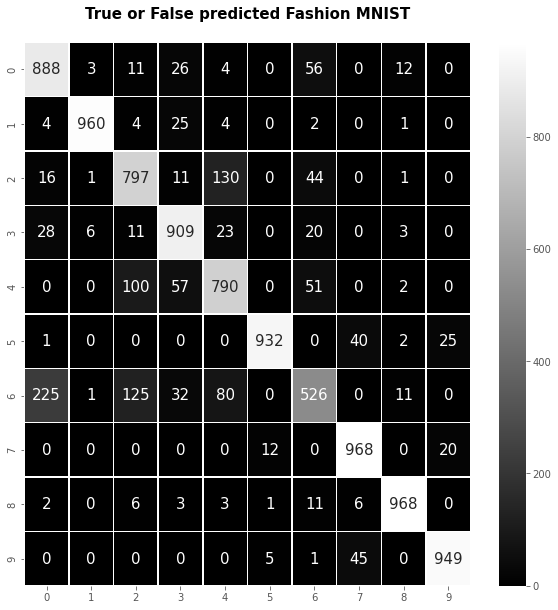

In [ ]:
#Confusion matrix for Fashion MNIST
con_mat=confusion_matrix(y_test_fash_eval,y_predict_fash)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted Fashion MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [ ]:
"""from sklearn.linear_model import SGDClassifier
# Let us train the model
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train_scaled, y_train_fashion)"""

sgd_accuracy = accuracy_score(y_test_fash_eval, y_predict_fash)
sgd_precision = precision_score(y_test_fash_eval, y_predict_fash, average='weighted')
sgd_recall = recall_score(y_test_fash_eval, y_predict_fash, average='weighted')
sgd_f1_score = f1_score(y_test_fash_eval, y_predict_fash, average='weighted')

print("SGD Accuracy: ", sgd_accuracy)
print("SGD Precision: ", sgd_precision)
print("SGD Recall: ", sgd_precision)
print("SGD F1 Score: ", sgd_f1_score)

SGD Accuracy:  0.8687
SGD Precision:  0.8684529236736312
SGD Recall:  0.8684529236736312
SGD F1 Score:  0.8659769741318766


In [ ]:
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

# make predictions on the test set
preds = model.predict(X_test_fashion)
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(y_test_fashion.argmax(axis=1), preds.argmax(axis=1),
	target_names=labelNames))
# plot the training loss and accuracy
N = 30
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on TEST Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

[INFO] evaluating network...
              precision    recall  f1-score   support

         top       0.78      0.92      0.84      6000
     trouser       1.00      0.98      0.99      6000
    pullover       0.80      0.82      0.81      6000
       dress       0.88      0.93      0.91      6000
        coat       0.79      0.82      0.80      6000
      sandal       0.99      0.96      0.97      6000
       shirt       0.79      0.56      0.66      6000
     sneaker       0.93      0.98      0.95      6000
         bag       0.98      0.98      0.98      6000
  ankle boot       0.97      0.96      0.96      6000

    accuracy                           0.89     60000
   macro avg       0.89      0.89      0.89     60000
weighted avg       0.89      0.89      0.89     60000



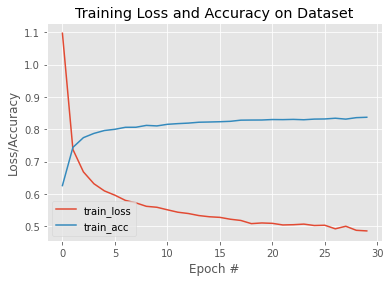

In [ ]:
# make predictions on the test set
preds = model.predict(X_train_fashion)
# show a nicely formatted classification report
print("[INFO] evaluating network...")
print(classification_report(y_train_fashion.argmax(axis=1), preds.argmax(axis=1),
	target_names=labelNames))
# plot the training loss and accuracy
N = 30
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
#plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
#plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on TRAIN Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")